# Linear regression

## Set up

In [2]:
#from Ipython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Training Data

In [3]:
# create data set of 100 examples and pne feature
def generate_data(n):
    
    w0 = 4.0
    w1 = 3.0

    X = 10*np.random.rand(n,)

    y = w0 + w1*X + np.random.randn(n,)

    return X, y

X, y = generate_data(100)

In [4]:
print("shape of training feature matrix: ", X.shape)
print("shape of label matrix: ", y.shape)

shape of training feature matrix:  (100,)
shape of label matrix:  (100,)


In [5]:
# Let's divide this into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Sanity Check
print("shape of training feature matrix: ", X_train.shape)
print("shape of training label matrix: ", y_train.shape)
print("shape of test feature matrix: ", X_test.shape)
print("shape of test label matrix: ", y_test.shape)

shape of training feature matrix:  (80,)
shape of training label matrix:  (80,)
shape of test feature matrix:  (20,)
shape of test label matrix:  (20,)


In [6]:
# Function to make plots

def make_plot(x,y):
    '''
        Function to make plot

        Args:
            x: x values
            y: y values
        
        Returns:
            plot of x vs y
    '''
    sns.set_style("white")
    f = plt.figure(figsize=(8,8))
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    plt.plot(X_train, y_train, "b.")
    plt.title("Data Points")
    plt.grid(True)
    plt.xlabel("$X_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0,10,0,40])

    plt.show()

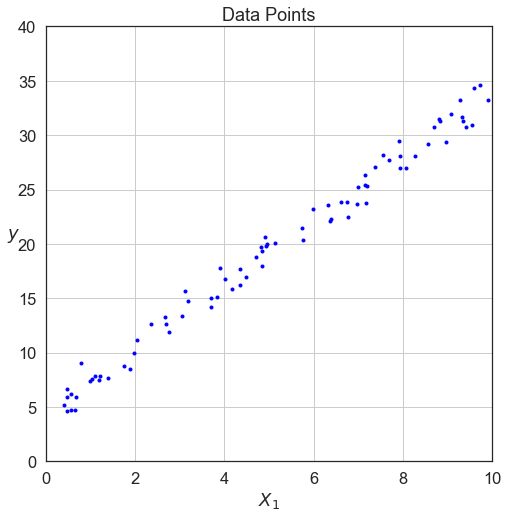

In [7]:
# Let's visualise

make_plot(X_train, y_train)

In [8]:
# Helper function to add dummy feature to our feature matrix

def add_dummy_feature(x):
    '''   
    Adds dummy feature to the dataset.

        Args:
            x: Training dataset

        Returns:
            Training dataset with an addition of dummy feature

    '''
    return np.column_stack((np.ones(x.shape[0]), x))
    

In [9]:
# Testing

import unittest

class TestAddDummyFeature(unittest.TestCase):

    def test_add_dummy_feature(self):
        ''' Test case function for add_dummy_feature'''

        train_matrix = np.array([[3,2,5],[9,4,7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        #test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2,4))

        # and contents
        np.testing.assert_array_equal(train_matrix_with_dummy_feature,np.array([[1,3,2,5],[1,9,4,7]]))
         
unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [10]:
# Let's add dummy feature to training set
print("Before adding dummy feature:\n", X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)

print("After adding dummy feature:\n", X_train_with_dummy[:5,:])

Before adding dummy feature:
 [4.84837015 7.90996557 1.18285481 0.78349442 1.39000645]


After adding dummy feature:
 [[1.         4.84837015]
 [1.         7.90996557]
 [1.         1.18285481]
 [1.         0.78349442]
 [1.         1.39000645]]


## Model

In [11]:
def predict(X,w):
    '''
    Prediction of ouotput label for a given input

    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1,)

    Returns:
        y: Predicted label vector of shape (n,) 

    '''
    #check to make sure the feature matrix and weight vector have compatible shapes
    assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
    return X @ w

In [12]:
# let's test the function
import unittest

class TestPredict(unittest.TestCase):

    def test_predict(self):
        '''Test case predict function of linear regression'''
        # Set up
        train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        expected_label_vector = np.array([11,21])

        #call
        predicted_label_vector = predict(train_matrix, weight_vector)

        #asserts
        #test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        # and the contents
        np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict', verbosity=2, exit=False)


test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## Demonstration on synthetic dataset

In [13]:
# Randomly initialise weight vector 

w = np.random.rand(2,)
w

array([0.84371484, 0.08406513])

In [14]:
# Predicted labels

y_hat = predict(X_train_with_dummy, w)

In [15]:
y_hat[:10]

array([1.25129369, 1.5086671 , 0.94315168, 0.9095794 , 0.96056591,
       1.25969056, 1.19456708, 1.66179871, 1.10668616, 1.57518569])

In [16]:
y[:10]

array([33.05413045, 29.21693778, 30.77271757, 20.05794122, 31.28789829,
        5.15471063, 15.15501549, 16.74192119, 25.45752211, 15.6535051 ])

## Loss function implementation

In [17]:
def loss(X, y, w):
    '''Calculates loss for a model based on known labels
    
    Args:
        X: Feature matrix for given inputs
        y: Output label vector as predicted by the given model
        w: Weight vector

    Returns:
        Loss
    '''

    err = predict(X,w) - y

    return (1/2)*(np.transpose(err) @ err)


In [18]:
# test cases

class TestLossFunction((unittest.TestCase)):
    
    def test_loss_function(self):
        '''Test case for loss function of linear regression'''

        # Set up
        feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        label_vector = np.array([6,11])
        expected_loss = np.array([62.5])

        # call
        loss_value = loss(feature_matrix, label_vector, weight_vector)

        #asserts
        #test the shape
        self.assertEqual(loss_value.shape, ())

        #and contents
        np.testing.assert_array_equal(expected_loss, loss_value)

unittest.main(argv=[''], defaultTest = 'TestLossFunction', verbosity = 2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Optimisation

In [19]:
# Let's generate some data

X, y = generate_data(100)

# Function to preprocess, Add dummy feature, test-train split

def preprocess(x, y):

    X = add_dummy_feature(x)

    return train_test_split(X, y)

X_train, X_test, y_train, y_test = preprocess(X, y)

### Normal Equation

In [20]:
def normal_equation(X,y):
    '''Estimates parameters of the linear regression model with normal equation.
    
    Args: 
        X: Feature matrix for given inputs.
        y: Actual label vector.

    Returns:
        Weight vector
    '''

    return np.linalg.pinv(X) @ y

In [21]:
import unittest

class TestNormalEquation(unittest.TestCase):
    
    def test_normal_equation(self):
        '''
            Test case for weeight estimation for linear regression with Normal equation method
        ''' 

        #Set up

        feature_matrix = X_train
        label_vector = y_train
        expected_weight_vector = np.array([4., 3.])

        #call
        estimated_weight_vector = normal_equation(feature_matrix, label_vector)

        #asserts
        #test the shape
        self.assertEqual(estimated_weight_vector.shape, (2,))

        #and contents
        np.testing.assert_array_almost_equal(estimated_weight_vector, expected_weight_vector, decimal=0)

unittest.main(argv=[''], defaultTest='TestNormalEquation', verbosity=2, exit=False)

test_normal_equation (__main__.TestNormalEquation)
Test case for weeight estimation for linear regression with Normal equation method ... ok

----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


### Gradient Descent(GD)

#### Gradient

In [22]:
def calculate_gradient(X, y, w):
    '''Calculates gradients of loss dunction wrt weight vector on training set
    
    Arguments:

        X: Feature matrix for training data.
        y: Label vector for training data
        w: Weight vector

    Returns:
        A vector of gradients.
    '''

    return np.transpose(X) @ (predict(X, w) - y)
    

In [23]:
class TestCalculateGradient(unittest.TestCase):

    def test_calculate_gradient(self):

        '''
        Test case for gradient descent
        '''

        #Set up
        feature_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        label_vector = np.array([6,11])
        expected_grad = np.array([15,105,50,95])

        #Call
        grad = calculate_gradient(feature_matrix, label_vector, weight_vector)

        #asserts
        #test the shape
        self.assertEqual(grad.shape, (4, ))

        #and contents
        np.testing.assert_array_almost_equal(expected_grad, grad, decimal=0)

unittest.main(argv=[''], defaultTest='TestCalculateGradient', verbosity=2,exit=False)

test_calculate_gradient (__main__.TestCalculateGradient)
Test case for gradient descent ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


#### Weight Updates

In [24]:
def update_weights(w, grad, lr):
    '''
    Updates the weights based on the gradient of loss function.

    Weight updates are carried out with the fiollowing formula:
        w_new := w_old - lr * grad

    Args:
        1. w: Weight vector
        2. grad: gradient of loss w.r.t w
        3. lr: learning rate

    Returns:
        Updated weight vector
    '''

    return (w - lr*grad)

In [25]:
class TestUpdateWeights(unittest.TestCase):

    def test_update_weight(self):

        #setup
        weight_vector = np.array([1,1,1,1])
        grad_vector = np.array([15, 105, 50, 95])
        lr = 0.001
        expected_w_new = np.array([0.985, 0.895, 0.95, 0.905])

        #call
        w_new = update_weights(weight_vector, grad_vector, lr)

        #asserts
        # test the shape
        self.assertEqual(expected_w_new.shape, (4, ))

        #and contents
        np.testing.assert_array_almost_equal(expected_w_new, w_new, decimal=1)

unittest.main(argv=[''], defaultTest='TestUpdateWeights', verbosity=2, exit=False) 

test_update_weight (__main__.TestUpdateWeights) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [26]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
    '''Estimates parameters of linear regression model through gradient descent.
    
    Arguments:
        X: Feature matrix for training data
        y: Label vector for training data
        lr: learning rate
        num_epochs: Number of training steps

    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vectors acrss different iterations
    '''

    w_all = [] #all paramenter across iterations
    err_all = [] # all arrors across iterations

    # parameter vector initialised to zero
    w = np.zeros((X.shape[1]))

    #Gradient descent loop
    print()
    for i in np.arange(0, num_epochs):
        w_all.append(w)

        #calculate arror due to the current weight vector:
        err_all.append(loss(X, y, w))

        #Gradient Calulation
        dJdW = calculate_gradient(X, y, w)

        # Print stats every 100 iterations
        if (i%100) == 0:
            print("iteration #: %d, loss: %4.2f" %(i, err_all[-1]))

        #Weight vector update.
        w = update_weights(w, dJdW, lr)

    return w, err_all, w_all

In [27]:
class TestGradientDescent(unittest.TestCase):

    def test_gradient_descend(self):
        '''
        Test case for weight estimation for linear regression with gradient descent method
        '''

        # Set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4., 3.])

        #call
        w, err_all, w_all = gradient_descent(feature_matrix, label_vector, lr=0.0001, num_epochs=2000)

        #asserts
        #test the shape
        self.assertEqual(w.shape, (2, ))

        #and contents
        np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''], defaultTest='TestGradientDescent', verbosity=2, exit=False)

test_gradient_descend (__main__.TestGradientDescent)
Test case for weight estimation for linear regression with gradient descent method ... ok

----------------------------------------------------------------------
Ran 1 test in 0.032s

OK



iteration #: 0, loss: 17744.10
iteration #: 100, loss: 118.17
iteration #: 200, loss: 90.00
iteration #: 300, loss: 70.97
iteration #: 400, loss: 58.11
iteration #: 500, loss: 49.41
iteration #: 600, loss: 43.54
iteration #: 700, loss: 39.57
iteration #: 800, loss: 36.89
iteration #: 900, loss: 35.08
iteration #: 1000, loss: 33.85
iteration #: 1100, loss: 33.03
iteration #: 1200, loss: 32.47
iteration #: 1300, loss: 32.09
iteration #: 1400, loss: 31.84
iteration #: 1500, loss: 31.66
iteration #: 1600, loss: 31.55
iteration #: 1700, loss: 31.47
iteration #: 1800, loss: 31.41
iteration #: 1900, loss: 31.38


#### Model trajectory

In [28]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr = 0.00001, num_epochs=200)


iteration #: 0, loss: 17744.10
iteration #: 100, loss: 213.06


<function matplotlib.pyplot.show(close=None, block=None)>

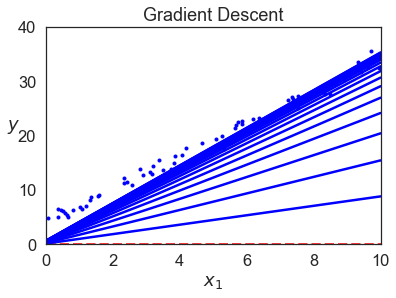

In [29]:
X_b = np.c_[np.ones((X.shape[0], 1)), X] # add X0 = 1 to each instance
X_new = np.array([[0],[10]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 =1 to each instance

for j in range(0, len(w_all)):
    if j%10 != 0: continue
    y_hat = predict(X_new_b, w_all[j])
    style = "b-" if j > 0 else "r--"
    plt.plot(X_new_b[:,1], y_hat, style)

plt.plot(X_train[:, 1], y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.title('Gradient Descent', fontsize=18)
plt.axis([0,10,0,40])
plt.show

In [30]:
def plot_learning_curve(err_all):
    plt.plot(err_all)
    plt.xlabel('Iteration #')
    plt.ylabel('Loss: $J(\mathbf{w})$')


iteration #: 0, loss: 17744.10
iteration #: 100, loss: 118.17
iteration #: 200, loss: 90.00
iteration #: 300, loss: 70.97
iteration #: 400, loss: 58.11
iteration #: 500, loss: 49.41
iteration #: 600, loss: 43.54
iteration #: 700, loss: 39.57
iteration #: 800, loss: 36.89
iteration #: 900, loss: 35.08
iteration #: 1000, loss: 33.85
iteration #: 1100, loss: 33.03
iteration #: 1200, loss: 32.47
iteration #: 1300, loss: 32.09
iteration #: 1400, loss: 31.84
iteration #: 1500, loss: 31.66
iteration #: 1600, loss: 31.55
iteration #: 1700, loss: 31.47
iteration #: 1800, loss: 31.41
iteration #: 1900, loss: 31.38


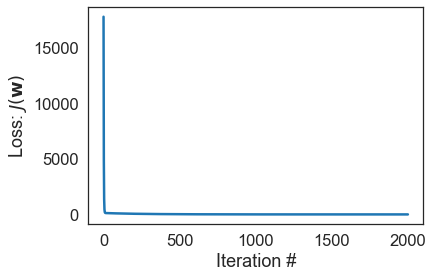

In [31]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr = 0.0001, num_epochs=2000 )
plot_learning_curve(err_all)

## Variations of GD

In [32]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X, y)

### Mini Batch Gradient Descent(MBGD)

In [33]:
t0, t1 = 200, 100000

def learning_schedule(t):
    return t0/(t + t1)

def mini_batch_gd(X: np.ndarray, y: np.ndarray, num_iters: int, minibatch_size: int):

    '''Estimates parametrs of linear regression model through gradient descent.
    
    Args:
        1. X: Feature matrix for training data.
        2. y: Label vector for training data.
        3. num_iters: Number of iterations.

    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vector acosss different iterations
    '''

    w_all = [] # all parameters across iterations.
    err_all = [] # error across iterations

    # Parameter vector initialised to [0,0]
    w = np.zeros((X.shape[1]))
    t = 0

    for epoch in range(num_iters):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], minibatch_size):
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            err_all.append(loss(xi, yi, w))

            gradients = 2/minibatch_size * calculate_gradient(xi, yi, w)
            lr = learning_schedule(t)

            w = update_weights(w, gradients, lr)
            w_all.append(w)

    return w, err_all, w_all

In [34]:
import unittest

class TestMiniBatchGradientDescent(unittest.TestCase):
    
    def test_minibatch_gd(self):
        '''
        Test case for weight estimation for linear regression with minibatch gradient descent method.
        '''

        #set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4., 3.])

        #call
        w, err_all, w_all = mini_batch_gd(feature_matrix, label_vector, 200, 8)

        #asserts
        #test the shape
        self.assertEqual(w.shape, (2, ))

        # And contents
        np.testing.assert_almost_equal(expected_weights, w, decimal=0)
    
    unittest.main(argv=[''], defaultTest='TestMiniBatchGradientDescent', verbosity=2, exit=False)

TestMiniBatchGradientDescent (unittest.loader._FailedTest) ... ERROR

ERROR: TestMiniBatchGradientDescent (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'TestMiniBatchGradientDescent'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


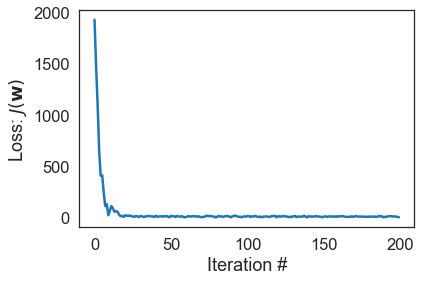

In [35]:
# learning curves

w, err_all, w_all = mini_batch_gd(X_train, y_train, 20, 8)
plot_learning_curve(err_all)

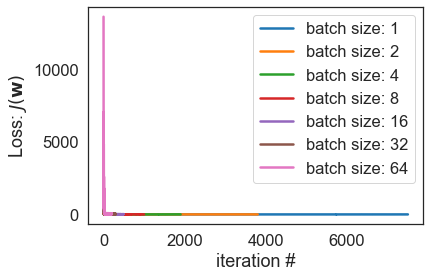

In [36]:
# different batch sizes

batch_sizes = [1, 2, 4, 8, 16, 32, 64]
mbgd_stats = {}

for batch_size in batch_sizes:
    w, err_all, w_all = mini_batch_gd(X_train, y_train, 100, batch_size)
    mbgd_stats[batch_size] = err_all
    legend = 'batch size: %d' %batch_size
    plt.plot(err_all, label=legend)

plt.xlabel('iteration #')
plt.ylabel('Loss: $J(\mathbf{w})$')
plt.legend()

### Stochastic Gradient Descent(MBGD)

In [37]:
def sgd(X: np.ndarray, y: np.ndarray, num_epochs: int):

    '''Estimates parametrs of linear regression model through stochastic gradient descent.
    
    Args:
        1. X: Feature matrix for training data.
        2. y: Label vector for training data.
        3. num_epochs: Number of epochs.

    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vector acosss different iterations
    '''

    w_all = [] # all parameters across iterations.
    err_all = [] # error across iterations

    # Parameter vector initialised to [0,0]
    w = np.zeros((X.shape[1]))

    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index: random_index + 1]
            yi = y[random_index: random_index + 1]
            err_all.append(loss(xi, yi, w))

            gradients = 2 * calculate_gradient(xi, yi, w)
            lr = learning_schedule(epoch * X.shape[0] + i)

            w = update_weights(w, gradients, lr)
            w_all.append(w)

    return w, err_all, w_all

In [39]:
class TestStochasticGradientDescent(unittest.TestCase):
    
    def test_sgd(self):
        '''
        Test case for weight estimation for linear regression with stochastic gradient descent method.
        '''

        #set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4., 3.])

        #call
        w, err_all, w_all = sgd(feature_matrix, label_vector, 200, 8)

        #asserts
        #test the shape
        self.assertEqual(w.shape, (2, ))

        # And contents
        np.testing.assert_almost_equal(expected_weights, w, decimal=0)
    
    unittest.main(argv=[''], defaultTest='TestMiniBatchGradientDescent', verbosity=2, exit=False)
    

test_minibatch_gd (__main__.TestMiniBatchGradientDescent)
Test case for weight estimation for linear regression with minibatch gradient descent method. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.064s

OK


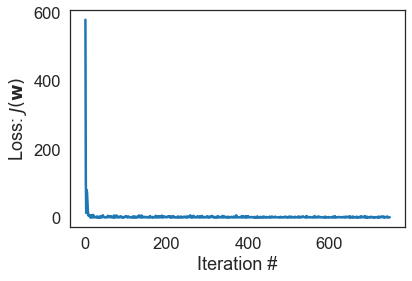

In [40]:
w, err_all, w_all = sgd(X_train, y_train, 10)
plot_learning_curve(err_all)

## End to end implementation

In [108]:
class LinReg(object):
    '''
    Linear regression Model
    ------------------------------------
    y = X@w
    X: A feature matrix
    w: weight vector
    y; Label Vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X:np.ndarray) -> np.ndarray:
        ''' Prediction of ouotput label for a given input

            Args:
                X: Feature matrix of shape (n, m+1).
                w: weight vector of shape (m+1,)

            Returns:
                y: Predicted label vector of shape (n,) 

        '''

        y = X @ self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculates loss for a model based on known labels
    
        Args:
            X: Feature matrix for given inputs
            y: Output label vector as predicted by the given model
            w: Weight vector

        Returns:
            Loss
        '''

        err = self.predict(X) - y
        return (1/2)*(np.transpose(err) @ err)

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:
        '''Calculate root mean square error of prediction wrt actual label.
        
        Args:
            X: Feature matrix for the given inputs
            y: output label vector as predicted by the given model

        Returns:
            Loss
        '''

        return np.sqrt((2/X.shape[0]) * self.loss(X, y))

    def fit(self, X:np.ndarray, y:np.ndarray) -> float:
        '''Estimates parameters of the linear regression model with normal equation.
    
        Args: 
            X: Feature matrix for given inputs.
            y: Actual label vector.

        Returns:
            Weight vector
        '''
        self.w = np.linalg.pinv(X) @ y 
        return self.w

    def calculate_gradient(self, X:np.ndarray, y:np.ndarray) -> np.ndarray:
        '''Calculates gradients of loss dunction wrt weight vector on training set
    
        Arguments:

            X: Feature matrix for training data.
            y: Label vector for training data
            w: Weight vector

        Returns:
            A vector of gradients.
        '''

        return np.transpose(X) @ (self.predict(X) - y)
    
    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on the gradient of loss function.

        Weight updates are carried out with the fiollowing formula:
            w_new := w_old - lr * grad

        Args:
            1. w: Weight vector
            2. grad: gradient of loss w.r.t w
            3. lr: learning rate

        Returns:
            Updated weight vector
        '''

        return (self.w - lr*grad)

    def learning_schedule(self, t) -> float:
        lr = (self.t0) / (t + self.t1)
        return lr

    def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
        '''Estimates parameters of linear regression model through gradient descent.
    
        Arguments:
            X: Feature matrix for training data
            y: Label vector for training data
            lr: learning rate
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vectors acrss different iterations
        '''
        self.w = np.zeros((X.shape[1])) # parameter vector initialised to zero
        self.w_all = [] #all paramenter across iterations
        self.err_all = [] # all arrors across iterations



        #Gradient descent loop
        for i in np.arange(0, num_epochs):

            #Gradient Calulation
            dJdW = self.calculate_gradient(X, y)

            self.w_all.append(self.w)

            #calculate arror due to the current weight vector:
            self.err_all.append(self.loss(X, y))

            #Weight vector update.
            self.w = self.update_weights(dJdW, lr)

        return self.w
    
    def mbgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, batch_size: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_iters: Number of iterations.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
         Weight vector acosss different iterations
        
        '''
        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))
        
        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i + batch_size]
                yi = y_shuffled[i: i + batch_size]
            
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                dJdW = 2/batch_size * self.calculate_gradient(xi, yi)

                self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int) -> np.ndarray:

        '''Estimates parametrs of linear regression model through stochastic gradient descent.
    
        Args:
            1. X: Feature matrix for training data.
            2. y: Label vector for training data.
            3. num_epochs: Number of epochs.

        Returns:
            Weight vector: Final weight vector
            Error vector across different iterations
            Weight vector acosss different iterations
        '''

        self.w_all = [] # all parameters across iterations.
        self.err_all = [] # error across iterations

        # Parameter vector initialised to [0,0]
        self.w = np.zeros((X.shape[1]))

        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index: random_index + 1]
                yi = y[random_index: random_index + 1]
            
                self. err_all.append(self.loss(xi, yi))
                self.w_all.append(self.w)

                gradients = 2 * self.calculate_gradient(xi, yi)
                lr = self.learning_schedule(epoch * X.shape[0] + i)

                self.w = self.update_weights(gradients, lr)
            

        return self.w

### Application on synthetic data

In [109]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)

In [110]:
lin_reg = LinReg()
lin_reg.fit(X_train, y_train)
print("weight vector(normal equation): ", lin_reg.w)

weight vector(normal equation):  [3.93483441 3.00599003]


In [111]:
lin_reg.gd(X_train, y_train, 1000, lr=1e-4)
print("weight vector(gd): ", lin_reg.w)

weight vector(gd):  [3.61701071 3.05346857]


In [112]:
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("weight vector(mbgd): ", lin_reg.w)

weight vector(mbgd):  [3.9245774  3.00570334]


In [113]:
lin_reg.sgd(X_train, y_train, 1000)
print("weight vector(sgd): ", lin_reg.w)

weight vector(sgd):  [3.98372304 2.96677878]


## Linear Regression on multiple features and single label

In [116]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=200, n_features=10, n_informative=10, n_targets=1, shuffle=True, coef=True, noise=0.5, random_state=0)

In [117]:
print("shape of feature matrix; ", X.shape)
print("Shape of label vector: ", y.shape)
print("Shape of coef vector: ", coef.shape)

shape of feature matrix;  (200, 10)
Shape of label vector:  (200,)
Shape of coef vector:  (10,)


In [118]:
print("Weight vectors used to generate data: ", coef)

Weight vectors used to generate data:  [40.05104636 10.32532207 51.90989393  6.18447832 41.09157343 28.46940664
 88.97621358  9.68032193 15.48694157 44.96944303]


In [119]:
X_train, X_test, y_train, y_test = preprocess(X, y)

In [121]:
lin_reg.fit(X_train, y_train) #Normal equation for weight vector estimation
print("Weight vector(normal eqn): ", lin_reg.w)

Weight vector(normal eqn):  [1.65817942e-03 3.99659958e+01 1.02976703e+01 5.19228628e+01
 6.27304055e+00 4.11664793e+01 2.84708067e+01 8.89522698e+01
 9.74152695e+00 1.54699680e+01 4.50024647e+01]


In [122]:
#Check if the coefficient are close enough
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)

In [123]:
lin_reg.gd(X_train, y_train, 1000, lr=1e-4)
print("weight vector(gd): ", lin_reg.w)

weight vector(gd):  [1.96668122e-03 3.99661060e+01 1.02980282e+01 5.19230683e+01
 6.27378431e+00 4.11662825e+01 2.84707443e+01 8.89512465e+01
 9.74178379e+00 1.54722782e+01 4.50025091e+01]


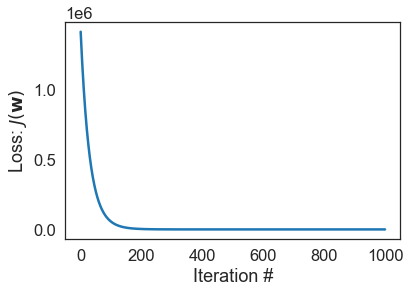

In [124]:
plot_learning_curve(lin_reg.err_all[:1000])

weight vector(mbgd):  [1.65054754e-03 3.99659400e+01 1.02977020e+01 5.19228330e+01
 6.27311545e+00 4.11663973e+01 2.84707927e+01 8.89521891e+01
 9.74155577e+00 1.54698989e+01 4.50025667e+01]


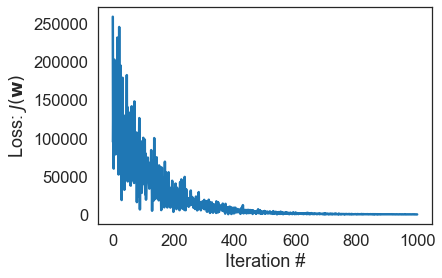

In [125]:
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("weight vector(mbgd): ", lin_reg.w)
plot_learning_curve(lin_reg.err_all[:1000])

In [126]:
#Check if the coefficient are close enough
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)

weight vector(mbgd):  [1.84491116e-02 3.99455615e+01 1.02920173e+01 5.19188466e+01
 6.28595598e+00 4.11506272e+01 2.84678604e+01 8.89366816e+01
 9.75118702e+00 1.54443298e+01 4.50166256e+01]


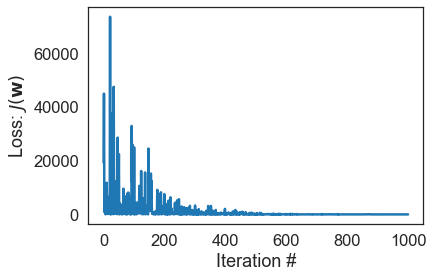

In [128]:
lin_reg.sgd(X_train, y_train, 1000)
print("weight vector(mbgd): ", lin_reg.w)
plot_learning_curve(lin_reg.err_all[:1000])

In [129]:
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)